### Logistic Regression Classification model

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

## Procedure 1: Train and test on the entire dataset

In [3]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [4]:
# import the class

from sklearn.linear_model import LogisticRegression

In [16]:
#just a test
X_2new = [[3,5,4,1],[1,1,3,4]]

In [9]:
# instantiate the model, fit the model with data
# and predict the response values fro the observations in x

logreg = LogisticRegression(solver='liblinear')
logreg.fit(X,y)
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
#store the values predicted
y_pred = logreg.predict(X)

#check how many predictions are generated
len(y_pred)

150

Classification accuracy: proportion of correct predictions

In [13]:
# Training accuracy
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


Testing KNN with K=5 and K=1 to check other models accuracy

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

0.9666666666666667


In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y,y_pred))

1.0


KNN = 1 is the most accurate for this data

It has memorized the exact same data, that is why it give 100% accuracy. That is the problem of training and testing on the same data

## Procedure 2: Train and test split

In [17]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [20]:
#split x and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=4)

In [21]:
#print the shape of the new 4 objects

In [22]:
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [23]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [25]:
# Training the model
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [26]:
# make the prediction
y_pred = logreg.predict(X_test)

# compare the actual value with the predicted
print(metrics.accuracy_score(y_test,y_pred))

0.9333333333333333


In [27]:
# knn 5

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9666666666666667


In [29]:
# knn 1

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.95


In [31]:
# Locate the best value for KNN
k_range = range(1,26)
scores = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

In [32]:
scores

[0.95,
 0.95,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9833333333333333,
 0.9666666666666667,
 0.9833333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.95,
 0.95]

In [33]:
import matplotlib.pyplot as plt

#allow plot to appear in the notebook
%matplotlib inline

Text(0, 0.5, 'Testing accuracy')

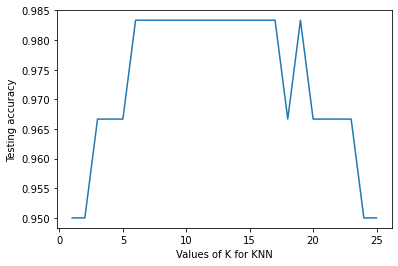

In [34]:
plt.plot(k_range,scores)
plt.xlabel("Values of K for KNN")
plt.ylabel("Testing accuracy")

## Making predictions on out of sample data

In [36]:
knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X,y)

knn.predict([[3,5,4,2]])

array([1])